# Computational Physics U24568
## Lecture 5b - Orbital Mechanics using ODEs

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# In addition to the imports, we'll also import some constants
# And also define our own
# NOTE: All units in SI
from scipy.constants import gravitational_constant, au

year = 365.25*24*3600 # seconds

mass_sun = 1.989e30 # kg

earth_distance = 1.496e11 # meters
# The Earth distance is also defined as 1 AU
mars_distance = 227.9*1.e9 # meters
jupiter_distance = 778.57*1.e9 # meters

# Gravity!

Continuing from the previous notebook, now we're going to try a more difficult problem: gravity! We'll do this in two dimensions for simplicity, though we could also do it in three dimensions. We've now got more variables than before. It's still ordinary differential equations though. The only derivative is a time derivative.

Now we want to solve a vector equation:

$$\vec{F~} = - \frac{G~M~m}{r^2} \hat{r~}$$

We'll take this to be the force on $m$, so $F = m a$. In terms of the unnormalized vector $\vec{r~}$, we have

$$\vec{a~} = - \frac{G~M}{r^2} \frac{\vec{r~}}{r}$$

where $r$ is the length of $\vec{r~}$.

So how do we put this into the form scipy expects? We define the position of the little object by
$$\vec{r~} = (x, y)$$
Then the length is
$$r = \sqrt{x^2 + y^2}$$
We have second-order differential equations for both $x$ and $y$. We need four variables $x$, $y$, $v_x$, $v_y$.

We also need to rescale our variables. Kilograms, meters, and seconds aren't great for describing orbits. We'll get a lot of huge numbers. Let's define a rescaling:
$$t = T~\tau$$
$$r = R~\rho$$
So the differential equation looks something like
$$\frac{d^2 r}{d t^2} = \frac{R}{T^2} \frac{d^2 \rho}{d \tau^2} = - \frac{G~M}{(R~\rho)^2}$$
or
$$\frac{d^2 \rho}{d \tau^2} = - \left( \frac{G~M~T^2}{R^3}\right) ~ \frac{1}{\rho^2}$$
All the units have been collected into one single factor. If we choose $R = 1~\mathrm{AU}$ and $T = 1~\mathrm{yr}$, and set $M$ to the mass of the Sun, this factor becomes a nice number close to $1$.

**Exercise 1.1**: There are several useful constants at the start of the notebook. Use them to determine the constant $\frac{G~M~T^2}{R^3}$. Call the variable `scale_factor`.

In [ ]:
# Answer
scale_factor = (gravitational_constant*mass_sun*year**2/earth_distance**3)

In [ ]:
# Note that the scale_factor is (2pi)^2
# which is related to the circular motion
np.sqrt(scale_factor)

6.283864767358395

Now we're ready to define the gravitational acceleration and start some calculations. Read the explanation above carefully, then

**Exercise 1.2**: Complete the derivatives function below.

In [ ]:
# Gravitational acceleration in 2D
def grav_derivs(state, t):
    x, y, vx, vy = state

    r =  (x**2 + y**2)**0.5# Calculate the distance from x and y
    acc =  - scale_factor/r**2 # Calculate the magnitude of the acceleration
    acc_x =  acc*x/r # Calculate the vector components of the acceleration
    acc_y =  acc*y/r # Calculate the vector components of the acceleration

    return (vx, vy, acc_x, acc_y)

**Exercise 1.3**: Read the two cells of code below. The equation is being solved. Answer the following questions:
 1. For what length of time is the orbit being solved?
 1. What is the starting position of the planet?
 1. What is the starting velocity?
 1. What kind of orbit do you expect?
Write brief answers, then run the code and see if you're correct. You may need to debug your derivatives function.

In [ ]:
times = np.linspace(0., 0.3, 100000)
r_init = (1., 0., 0., 1.) # Starting values at t = 0
rarr = odeint(grav_derivs, r_init, times)

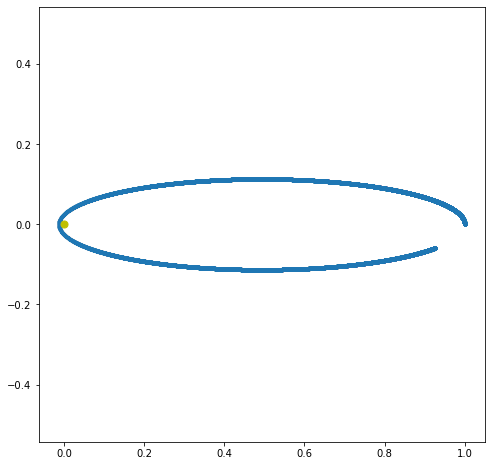

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(rarr[:,0], rarr[:,1], s=5)
plt.scatter(0., 0., c='y', s=50)
plt.gca().set_aspect('equal', 'datalim')

Your answers here:




 * The equation is being olved for 0.3 years.
  * The planet starts at (1, 0) (in units of AU)
  * The starting velocity is (0, 1) (in units of AU/yr)
  * I expect this to be an eccentric orbit, or possibly hyperbolic. Only one choice of velocity gives a circular orbit.

## Earth's Actual Orbit

We just guessed at the initial conditions, and we get a very elliptical orbit. Using the formula for acceleration on a circle

$$v^2/r = G~M/r^2$$

So the velocity on a circular orbit should be

$$v = \sqrt{G~M/r}$$

Remembering our scale factor, this becomes

$$v = \sqrt{\frac{G~M T^2}{R^3} \frac{1}{\rho}}$$


We can use that to get the initial conditions correct.

**Exercise 2.1**: Fill in the initial condition below to get a circular orbit at $r = 1$.

In [ ]:
r_init2 = (1., 0., 0., np.sqrt(scale_factor)) # FIXME: Change the last value
times = np.linspace(0., 10, 10000)
rarr2 = odeint(grav_derivs, r_init2, times)

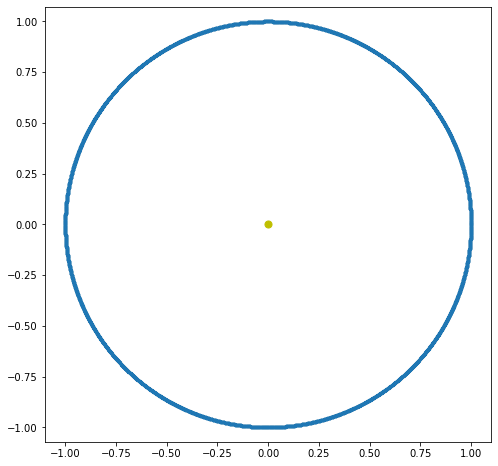

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(rarr2[:,0], rarr2[:,1], s=5)
plt.scatter(0., 0., c='y', s=50)
plt.gca().set_aspect('equal', 'datalim')

**Exercise 2.2**: Find how long a single orbit takes. Does this make sense?

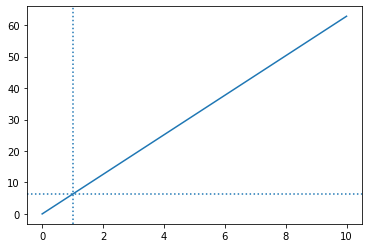

In [ ]:
plt.plot(times, np.unwrap(np.arctan2(rarr2[:,1], rarr2[:,0])))
plt.axhline(2*np.pi, ls=':')
plt.axvline(1, ls=':')

The Earth goes $2 \pi$ radians around the Sun in 1 year.

**Exercise 2.3**: Play with the conditions below, shooting the planet toward the sun but offset a bit in $y$ so it doesn't go straight through the center. What kind of shapes do you get? Note that we use a different `times` array than the others, so orbits that go way off can be stopped early if you want.

In [ ]:
r_init3 = (1, 0.4, -10., 0.) # FIXME: Try different values
times3 = np.linspace(0., 2, 1000)
rarr3 = odeint(grav_derivs, r_init3, times)

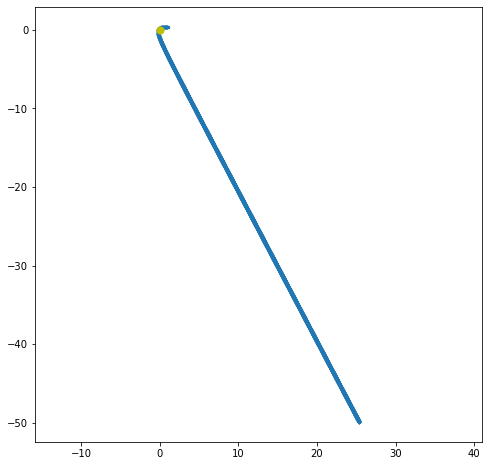

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(rarr3[:,0], rarr3[:,1], s=5)
plt.scatter(0., 0., c='y', s=50) # The sun
plt.gca().set_aspect('equal', 'datalim')

We have a slingshot around the Sun. Technically it's a hyperbola. The angle of deflection will be smaller the more we displace it from going straight toward the Sun.

**Exercise 2.4**: We've defined the distance from Mars to the Sun in kilometers as `mars_distance`. Define `r_mars` in our units (the ones where the Earth is at $r = 1$, and change the initial conditions below to simulate Mars rather than Earth.

In [ ]:
r_mars = mars_distance / earth_distance

In [ ]:
r_init4 = (r_mars, 0., 0., np.sqrt(scale_factor/r_mars)) # FIXME: Set correct x and vy for Mars
rarr4 = odeint(grav_derivs, r_init4, times)

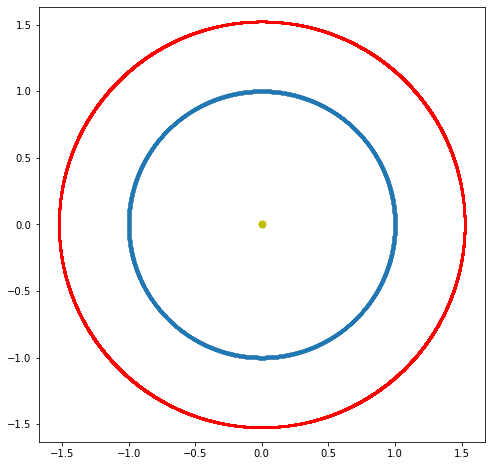

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(rarr2[:,0], rarr2[:,1], s=5)
plt.scatter(rarr4[:,0], rarr4[:,1], c='r', s=4)
plt.scatter(0., 0., c='y', s=50) # The sun
plt.gca().set_aspect('equal', 'datalim')

## Mission to Mars

Let's try to plan a mission from Earth to Mars. Define a third object, a spacecraft. Give it the same initial position as Earth, but slightly more velocity.

**Exercise 3.1**: Make the initial conditions, integrate them to get `rarr5`, and make a plot of the three bodies.

In [ ]:
r_init5 = (1., 0., 0., 1.1*(scale_factor)**0.5) # FIXME: Change the last value
times = np.linspace(0., 10, 10000)
rarr5 = odeint(grav_derivs, r_init5, times)

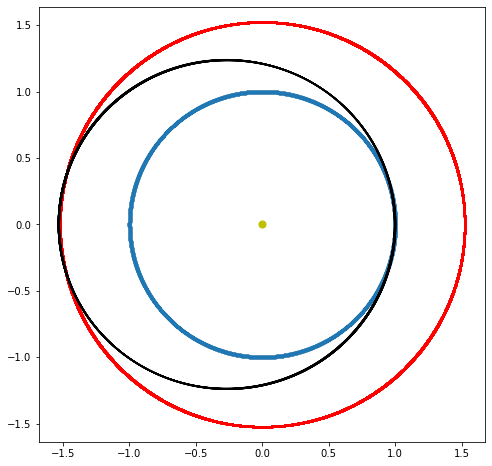

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(rarr2[:,0], rarr2[:,1], s=5)
plt.scatter(rarr4[:,0], rarr4[:,1], c='r', s=4)
plt.scatter(rarr5[:,0], rarr5[:,1], c='k', ls=':', s=2)
plt.scatter(0., 0., c='y', s=50) # The sun
plt.gca().set_aspect('equal', 'datalim')

## Hohmann Transfer Orbit

A Hohmann transfer orbit is the minimum-energy way to go from one circular orbit to another in the same plane. It's an elliptical orbit that just barely touches both circular orbits. You can read about it on [Wikipedia](https://en.wikipedia.org/wiki/Hohmann_transfer_orbit).

For the initial conditions, we can start the spacecraft at the same position as Earth at $t = 0$, i.e. $(x, y) = (1, 0)$. But we need to choose the correct velocity to reach Mars's orbit. We could write down the energy equation and solve it, or we could let the computer solve it.

**Exercise 3.2**: Write a function that takes the output of `odeint` and gives an array of the distance of the spacecraft from the Sun.

In [ ]:
def get_distances(rarr):
    return (rarr[:,0]**2 + rarr[:,1]**2)**0.5

**Exercise 3.3**: Now write a function that finds the maximum radius of the craft

In [ ]:
def get_max_distance(rarr):
    return np.max(get_distances(rarr))

get_max_distance(rarr5)

1.5316457337774763

**Exercise 3.4**: Now put it together. Write a function that takes an initial velocity, solves the ODE, then finds the maximum radius that the orbit of the craft reaches. Test the function and make sure it gives sensible results (e.g. what happens when it has the same velocity as the Earth?).

In [ ]:
def find_orbit_dist(launch_velocity):
    r_initO = (1., 0., 0., launch_velocity) # FIXME: Change the last value
    times = np.linspace(0., 100, 10000)
    rarrO = odeint(grav_derivs, r_initO, times)
    return abs(get_max_distance(rarrO) - r_mars)

Now let's automate finding the best value! Using `fsolve`, you can find the root of a function. See the example below. You need to give it a function that returns zero when it's at the right answer, so it's good to have it return the square of the max distance minus the distance that you want it to reach (`r_mars`).


In [ ]:
from scipy.optimize import fsolve

def test(x):
    return (x - 2.)**2

fsolve(test, 1.)

array([2.])

In [ ]:
fsolve?

**Exercise 3.4**: Use `fsolve` to find an orbit for the spacecraft that leaves Earth, and just reaches Mars.

In [ ]:
v_launch = fsolve(find_orbit_dist, (scale_factor)**0.5)[0]

In [ ]:
v_launch

6.9048717864374245

This is a more accurate version of what we found above by trial and error.

**Exercise  3.5** (quite difficult): This orbit only works when Earth and Mars are at certain positions. Find the correct relative positions of Earth and Mars such that the spacecraft reaches Mars, then plot your solution. How far apart in time are the launch windows?

In [ ]:
times = np.linspace(0., 1, 10000)

r_init6 = (r_mars, 0., 0., np.sqrt(scale_factor/r_mars)) # FIXME: Set correct x and vy for Mars
rarr6 = odeint(grav_derivs, r_init6, times)

r_init7 = (1., 0., 0., v_launch)
rarr7 = odeint(grav_derivs, r_init7, times)


In [ ]:
# When does the orbit reach Mars?
# i.e. the left side of the plot
i_mars = np.argmin(rarr7[:,0])
t_mars = times[i_mars]
t_mars

0.7085708570857085

In [ ]:
# How far does Mars rotate in this time?
angle_diff = np.arctan2(rarr6[i_mars,1], rarr6[i_mars,0])

In [ ]:
# We need Mars to be at 180 degrees at this time
angle_mars = np.pi - angle_diff

v_mars = np.sqrt(scale_factor/r_mars)
r_init8 = (r_mars*np.cos(angle_mars),
            r_mars*np.sin(angle_mars),
            -v_mars*np.sin(angle_mars),
            v_mars*np.cos(angle_mars))
rarr8 = odeint(grav_derivs, r_init8, times)


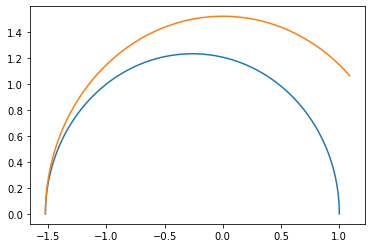

In [ ]:
plt.plot(rarr7[:i_mars,0], rarr7[:i_mars,1])
plt.plot(rarr8[:i_mars,0], rarr8[:i_mars,1])

## Challenges

Once you've finished the above, go ahead and try whichever of these appeal to you.

 * What if gravity were an inverse cube rather than an inverse square law? What do the orbits look like, are they stable? This is what would happen if there were three space dimensions.
 * Simulate a solar sail mission, see the hints below.
 * Add in the force from a rocket. See the hints below.
 * Add some drag, as if the solar system were filled with dust or gas. The force would be opposite the velocity, and probably scale with velocity or velocity squared.
 * Give each of the planets masses and let them attract the spacecraft. Investigate the Lagrange points where the gravitational force cancels.

## Inverse Cube Law

Just replace $\frac{1}{r^2}$ with $\frac{1}{r^3}$. You can also add in a little bit of a $\frac{1}{r^3}$ term to the one currently there. This actually happens due to the oblateness of the Sun and also General Relativity, and we measure these effects on Mercury. You need an elliptical orbit to see them though.

## Solar sail

The intensity of sunlight at Earth's orbit is 1400 Watts per square meter. That falls off like $1/r^2$. The pressure of light is intensity divided by the speed of light.

To get the acceleration provided by a solar sail, multiply the pressure of the sunlight by the area of your solar sail, and divide by the mass of your craft. It's not like gravity, the mass of your craft doesn't divide out. You might have a tiny probe of a few kilograms, or maybe a metric ton like a more typical craft.

The force of the sunlight points directly out from the Sun, so in the opposite direction from gravity.

In [ ]:
from scipy.constants import speed_of_light

## Rocket

To make the rocket interesting, let's always point it at a 90 degree angle from the sun. We need a unit vector that's perpendicular to $\hat{r~}$. We can use the cross product with $z$.

$$\hat{\theta~} = \left( \frac{x}{r}, \frac{y}{r}, 0 \right) \times \left( 0, 0, 1 \right)$$

You can make it a constant force or whatever you want. A real rocket would lose mass as it expends its fuel, if you want to simulate that.

## Giving planets mass

We'll need to start by defining a derivatives function that will simulate all the orbits at once, because the forces now depend on all positions. The `state` variable now has $4N$ components, two position and two velocity for each object.

The best way to make this work is to write a loop through the $N$ objects, finding the derivatives for that object, and building up a list of all of the derivatives. If you have a list, and you want to add several things to it, you can do something like `lst.extend([1,2,3,4])` - it's similar to `append` but for multiple elements.

You also need to set masses (scaled relative to the sun's mass) for all the planets, and calculate forces based on the vectors between them.

## CHALLENGING EXERCISE - Slingshot

Slingshot (https://libregamewiki.org/Slingshot) is an old game where the goal is to shoot "arrows" from your stationary spaceship around a set of planetoids to reach your opponent. The "arrow" is attracted by the gravity of the planetoids as it moves and therefore sometimes the path to take is highly nontrivial!
In this exercise your goal is to simulate a single shot and plot the trajectory. Here is the step-by-step instructions

1: Put your spaceship at x=0, y=0. Display this with a red triangle on a plot.

2: Put the opponent's spaceship at x=100, y=0. Display this with a green triangle on the same plot.

3: Choose a planetoids with x position between 10 and 90, and y position between -30 and 30. Add these to the plot as a black circle.

4: Ask the user to set the initial speed and initial shot direction (by using the input function). The initial speed should be a value between 0 and 10 (set it to 10 if it is larger), and the initial direction is an angle between 0 and 360 degrees.

5: Use the techniques above to solve the differential equations governing how the arrow will move and predict the motion of the show. Stop the evolution if the x position is smaller than -20 or larger than 120 or if the y position is larger than 50 or smaller than -50.

The equations governing the motion of the particle are those of Newtonian gravity (projected into 2 dimensions). We have to solve both for x-motion and for y-motion separately. To do this we calculate the acceleration at a given time, use this to compute the change in velocity, and update the position according to the velocity. So in order of how something would be solved at a given time point:

$$ \frac{dv_x}{dt}  = a_x = \frac{ - G M}{r^2} (x_a - x_p/r) $$

$$ \frac{dx_a}{dt} = v_x $$

$$ \frac{dv_y}{dt}  = a_y = \frac{ - G M}{r^2} (y_a - y_p/r) $$

$$ \frac{dy_a}{dt} = v_y $$

Where here a is the acceleration of the arrow (in the x and y directions), v is the velocity (in the x and y directions) and are the x and y positions of the arrow and and are the positions of the planetoid (the position of the planetoid doesn't change). M is the mass of the planetoid; set this to 10, and G to 10 (but if you find the planetoid is too gravitationally strong, or too weak, try adjusting this value). r is the distance between the arrow and the planetoid $r = ((x_a - x_p)^2 + (y_a - y_p)^2)^{0.5}$.

If you get this working try adding multiple planetoids (then the a equation becomes a sum over different contributions) and draw the position of these planetoids randomly so you get a different game each time. Also stop the motion of the arrow if it comes within a distance of 1 of the opponent's ship. Display appropriate text based on if the arrow hits, or misses, the ship.
